In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import mantis_core.rock_physics as manRP
import mantis_core.rock_physics.fluid as manFL
from mantis_core.rock_physics.fluid_presets import presets as manPResets
import numpy as np

In [2]:
water = manRP.fluid.Fluid.from_presets(name="Water", temperature=30, pressure=25)
co2 = manRP.fluid.Fluid.from_presets(name="CarbonDioxide", temperature=30, pressure=25)
water_co2_mix = manRP.fluid.FluidMix(fluid1=water, fluid2=co2)

In [51]:
in_situ = {"Vp": 3.8, "Vs": 1.8, "Rho": 2.5}
water_co2_mix.saturation = 1
parameters = {
    "Phi": 0.2,
    "Km": 37.5,
    "fluid": water_co2_mix,
    "permeability": 1e-12,
    "patch_size": 0.0001,
    "bubble_radius": 0.0005,
    "Q_sls":15,
    "Log_omega_ref":0,
    "crack_density": 0.01,
    "aspect_ratio": 0.000001,
    "eps": 0.1,
    # "tau": np.log10(1 / 2 / np.pi / 35),
    "tau":10
}

pars = {**in_situ, **parameters}

In [52]:

models = {
    str(model.__name__).split(".")[-1]: {
        "name": model.Model.name,
        "type": model.Model.model_type.split(","),
    }
    for model in manRP.model_factory.ModelsBuild.models
}
calibrated = {model: manRP.models(identifier=model, **pars) for model in models}

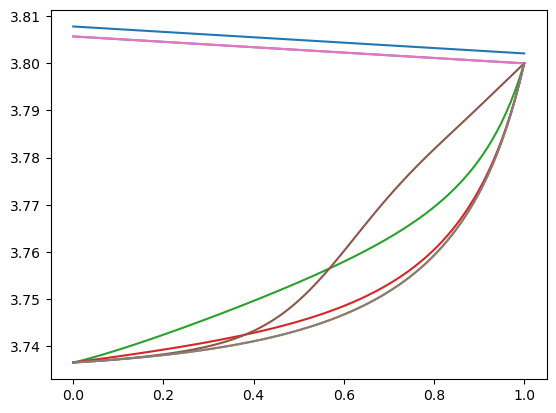

In [53]:
s = np.linspace(0, 1, 100)
water_co2_mix.saturation = 1
density = manRP.density.Density.from_insitu(Rho=in_situ["Rho"], fluid=water_co2_mix,Rho_d=2.65)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = np.empty((len(calibrated), len(s)))
for j, sat in enumerate(s):
    water_co2_mix.saturation = sat
    for i, model in enumerate(calibrated.items()):
        m, v = model
        data[i, j] = np.real(np.sqrt(v.Cij()[0,0]/density()))
ax.plot(s, data[0, :])
ax.plot(s, data[1, :])
ax.plot(s, data[2, :])
ax.plot(s, data[3, :])
ax.plot(s, data[4, :])
ax.plot(s, data[5, :])
ax.plot(s, data[6, :])
ax.plot(s, data[7, :])

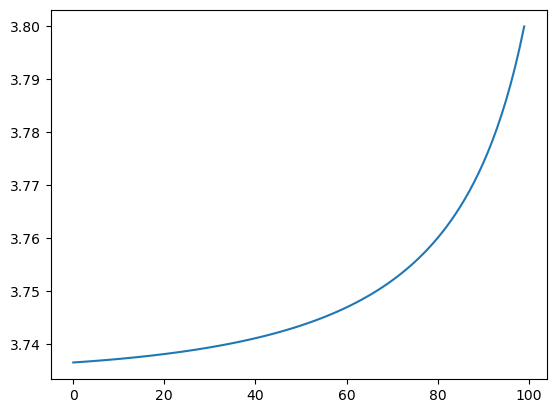

In [54]:
plt.plot(data[7, :])

In [29]:
calibrated.keys()

dict_keys(['sls', 'gassmann', 'crm1d', 'crm3d', 'hudson', 'white', 'generic', 'chapman'])

In [5]:
[val.Cij()[0,0] for model, val in calibrated.items()]

[(36.1+2.406666666666666j),
 36.1,
 36.1,
 36.1,
 36.09999317370644,
 36.1,
 36.1,
 (36.1+0j)]

In [84]:
for model in manRP.model_factory.ModelsBuild.models:
    if " frequency-independent" in model.Model.model_type.split(","):
        print(model.Model.reference) 


        - Gassmann, F. (1951). 
            'Uber die Elastizitat poroser Medien.'
            Vierteljahrsschrift der Naturforschenden Gesellschaft in Zurich, 96, 1-23.
        
        also see:
        
        - Berryman, James G. 
            'Origin of Gassmann's equations.' 
            Geophysics 64.5 (1999): 1627-1629.
    

    Hudson, John A. 
    "Wave speeds and attenuation of elastic waves 
    in material containing cracks." 
    Geophysical Journal International 64.1 (1981): 133-150.

    

    placeholder (identity) model
    
